## 3.1 Domain Specific Dataset Analysis

### Domain 3 - 3D Printer Patents

#### Import necessary libraries

In [1]:
import nltk 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer

#### Read in 20 documents from .txt files located in the specified directory and store them into a DataFrame

In [16]:
#read all medical research papers
#store one in each row in a column called "data"
file_path = 'domain3_data'
all_files = os.listdir(file_path)  

data = []
for file_name in all_files:
    this_file = open(os.path.join(file_path, file_name), encoding='utf8', errors='ignore')
    file_content = this_file.read()
    data.append([file_content]) 

df = pd.DataFrame(data, columns=['data'])
df = df.drop([0]).reset_index(drop=True)
df

,data
0,Lung-targeted delivery of TGF-β antisense olig...
1,Liver Fatty Acid-binding Protein Initiates Bud...
2,Superhydrophobic Coatings for Urinary Catheter...
3,A review on engineering polymer drug conjugate...
4,Lung-targeted delivery of TGF-β antisense olig...
5,Study of the effects of dietary polyunsaturate...
6,Portal hypertensive gastropathy: association w...
7,Novel pH/reduction responsive graphene oxide n...
8,Urinary glicosaminoglycans levels in women wit...
9,Automated Acquisition of Proximal Femur\nMorph...


#### Perform Tokenization using NLTK word_tokenize - splits strings into tokens (nominally words). It splits tokens based on white space and punctuation. 

In [6]:
#tokenise each document and store in a new column called "tokens"
df['tokens'] = df.apply(lambda row : word_tokenize(row['data']), axis = 1)
df


,data,tokens
0,Lung-targeted delivery of TGF-β antisense olig...,"[Lung-targeted, delivery, of, TGF-β, antisense..."
1,Liver Fatty Acid-binding Protein Initiates Bud...,"[Liver, Fatty, Acid-binding, Protein, Initiate..."
2,Superhydrophobic Coatings for Urinary Catheter...,"[Superhydrophobic, Coatings, for, Urinary, Cat..."
3,A review on engineering polymer drug conjugate...,"[A, review, on, engineering, polymer, drug, co..."
4,Lung-targeted delivery of TGF-β antisense olig...,"[Lung-targeted, delivery, of, TGF-β, antisense..."
5,Study of the effects of dietary polyunsaturate...,"[Study, of, the, effects, of, dietary, polyuns..."
6,Portal hypertensive gastropathy: association w...,"[Portal, hypertensive, gastropathy, :, associa..."
7,Novel pH/reduction responsive graphene oxide n...,"[Novel, pH/reduction, responsive, graphene, ox..."
8,Urinary glicosaminoglycans levels in women wit...,"[Urinary, glicosaminoglycans, levels, in, wome..."
9,Automated Acquisition of Proximal Femur\nMorph...,"[Automated, Acquisition, of, Proximal, Femur, ..."


In [7]:
#write back into csv for future reference
# df.to_csv(os.path.join(file_path, 'tokens.csv'), index=False)

#### The token distributions before stemming is shown below

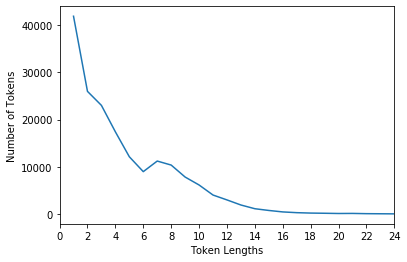

In [8]:
len_dict = {}
for index, row in df.iterrows():
    for token in row['tokens']:
        tlen = len(token)
        if tlen in len_dict.keys():
            len_dict[tlen]+=1
        else:
            len_dict[tlen]=1

len_dict = dict(sorted(len_dict.items()))
all_len = list(len_dict.keys())
num_tokens = list(len_dict.values())
plt.plot(all_len, num_tokens)
plt.xlabel('Token Lengths')
plt.xlim(0,20)
plt.xticks(np.arange(0, 25, 2))
plt.ylabel('Number of Tokens')
plt.show()

#### Perform Stemming using PorterStemmer. The Porter stemming algorithm is a process for removing the commoner morphological and inflexional endings from words in English.

In [9]:
stemming = PorterStemmer()
stemmed = []
df['stemmed'] = ""
for index,row in df.iterrows(): 
    stem_each = []
    for token in row['tokens']:
        stem_each.append(stemming.stem(token))
        df['stemmed'][index] = stem_each
    stemmed.append(stem_each)

df

,data,tokens,stemmed
0,Lung-targeted delivery of TGF-β antisense olig...,"[Lung-targeted, delivery, of, TGF-β, antisense...","[lung-target, deliveri, of, tgf-β, antisens, o..."
1,Liver Fatty Acid-binding Protein Initiates Bud...,"[Liver, Fatty, Acid-binding, Protein, Initiate...","[liver, fatti, acid-bind, protein, initi, bud,..."
2,Superhydrophobic Coatings for Urinary Catheter...,"[Superhydrophobic, Coatings, for, Urinary, Cat...","[superhydrophob, coat, for, urinari, cathet, T..."
3,A review on engineering polymer drug conjugate...,"[A, review, on, engineering, polymer, drug, co...","[A, review, on, engin, polym, drug, conjug, to..."
4,Lung-targeted delivery of TGF-β antisense olig...,"[Lung-targeted, delivery, of, TGF-β, antisense...","[lung-target, deliveri, of, tgf-β, antisens, o..."
5,Study of the effects of dietary polyunsaturate...,"[Study, of, the, effects, of, dietary, polyuns...","[studi, of, the, effect, of, dietari, polyunsa..."
6,Portal hypertensive gastropathy: association w...,"[Portal, hypertensive, gastropathy, :, associa...","[portal, hypertens, gastropathi, :, associ, wi..."
7,Novel pH/reduction responsive graphene oxide n...,"[Novel, pH/reduction, responsive, graphene, ox...","[novel, ph/reduct, respons, graphen, oxid, nan..."
8,Urinary glicosaminoglycans levels in women wit...,"[Urinary, glicosaminoglycans, levels, in, wome...","[urinari, glicosaminoglycan, level, in, women,..."
9,Automated Acquisition of Proximal Femur\nMorph...,"[Automated, Acquisition, of, Proximal, Femur, ...","[autom, acquisit, of, proxim, femur, morpholog..."


In [10]:
#write back into csv for future reference
# df.to_csv(os.path.join(file_path, 'stems.csv'), index=False)

#### The token distribution after stemming is shown below

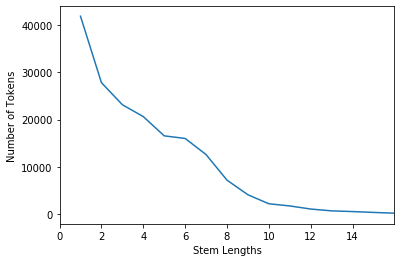

In [11]:
len_dict = {}
for index, row in df.iterrows():
    for token in row['stemmed']:
        tlen = len(token)
        if tlen in len_dict.keys():
            len_dict[tlen]+=1
        else:
            len_dict[tlen]=1

len_dict = dict(sorted(len_dict.items()))
all_len = list(len_dict.keys())
num_tokens = list(len_dict.values())
plt.plot(all_len, num_tokens)
plt.xlabel('Stem Lengths')
plt.xlim(0,16)
plt.xticks(np.arange(0, 16, 2))
plt.ylabel('Number of Tokens')
plt.show()

#### Dataframe after Tokenization, Stemming and Sentence Segmentation
#### Sentence segmentation is done using sent_tokenize from NLTK. The sent_tokenize function uses an instance of PunktSentenceTokenizer from the nltk. The punkt module, has already been trained and can mark the end and beginning of sentence at  characters and punctuation.

In [12]:
df['sentences'] = df.apply(lambda row : sent_tokenize(row['data']), axis = 1)
# df.to_csv('sentences.csv', index=False)
df

,data,tokens,stemmed,sentences
0,Lung-targeted delivery of TGF-β antisense olig...,"[Lung-targeted, delivery, of, TGF-β, antisense...","[lung-target, deliveri, of, tgf-β, antisens, o...",[Lung-targeted delivery of TGF-β antisense oli...
1,Liver Fatty Acid-binding Protein Initiates Bud...,"[Liver, Fatty, Acid-binding, Protein, Initiate...","[liver, fatti, acid-bind, protein, initi, bud,...",[Liver Fatty Acid-binding Protein Initiates Bu...
2,Superhydrophobic Coatings for Urinary Catheter...,"[Superhydrophobic, Coatings, for, Urinary, Cat...","[superhydrophob, coat, for, urinari, cathet, T...",[Superhydrophobic Coatings for Urinary Cathete...
3,A review on engineering polymer drug conjugate...,"[A, review, on, engineering, polymer, drug, co...","[A, review, on, engin, polym, drug, conjug, to...",[A review on engineering polymer drug conjugat...
4,Lung-targeted delivery of TGF-β antisense olig...,"[Lung-targeted, delivery, of, TGF-β, antisense...","[lung-target, deliveri, of, tgf-β, antisens, o...",[Lung-targeted delivery of TGF-β antisense oli...
5,Study of the effects of dietary polyunsaturate...,"[Study, of, the, effects, of, dietary, polyuns...","[studi, of, the, effect, of, dietari, polyunsa...",[Study of the effects of dietary polyunsaturat...
6,Portal hypertensive gastropathy: association w...,"[Portal, hypertensive, gastropathy, :, associa...","[portal, hypertens, gastropathi, :, associ, wi...",[Portal hypertensive gastropathy: association ...
7,Novel pH/reduction responsive graphene oxide n...,"[Novel, pH/reduction, responsive, graphene, ox...","[novel, ph/reduct, respons, graphen, oxid, nan...",[Novel pH/reduction responsive graphene oxide ...
8,Urinary glicosaminoglycans levels in women wit...,"[Urinary, glicosaminoglycans, levels, in, wome...","[urinari, glicosaminoglycan, level, in, women,...",[Urinary glicosaminoglycans levels in women wi...
9,Automated Acquisition of Proximal Femur\nMorph...,"[Automated, Acquisition, of, Proximal, Femur, ...","[autom, acquisit, of, proxim, femur, morpholog...",[Automated Acquisition of Proximal Femur\nMorp...


#### Distribution of the sentence lengths across this domain is shown below

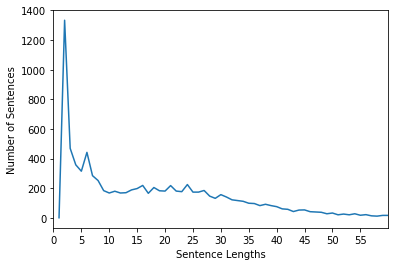

In [13]:
len_dict = {}
for index, row in df.iterrows():
    for sentence in row['sentences']:
        x = word_tokenize(sentence)
        len_this_sent = len(x)
        if len_this_sent in len_dict.keys():
            len_dict[len_this_sent]+=1
        else:
            len_dict[len_this_sent]=1

len_dict = dict(sorted(len_dict.items()))
all_len = list(len_dict.keys())
num_tokens = list(len_dict.values())
plt.plot(all_len, num_tokens)
plt.xlabel('Sentence Lengths')
plt.xlim(0,60)
plt.xticks(np.arange(0, 60, 5))
# plt.yticks(np.arange(0, 5, 1))
plt.ylabel('Number of Sentences')
plt.show()

#### Choose 3 sentences for POS tagging

In [14]:
sentences = ["For a 3D object with over hangs or other floating features not connected to the ground, there are not underlying layers of the objects to support the overhangs.", "Further, it is also a problem in the art to provide an improved modeling filament Supply and/or novel modeling filament materials for use in 3D printing technology.", "A first object of the present invention is to provide a 3D determining a feeding speed by the cross section area S of printer spray nozzle , which is capable of adjusting cross the filament actually sprayed by the extruder and the unit section areas of extruded materials to adjust printing speed printing forming area L"]

#### Implement POS tagging using NLTK's pos_tag() function 

In [15]:
pos_result = []
for i in range(0,3):
    text = word_tokenize(sentences[i])
    pos_temp = nltk.pos_tag(text)
    pos_result.append(pos_temp)
pos_result

[[('For', 'IN'),
  ('a', 'DT'),
  ('3D', 'CD'),
  ('object', 'NN'),
  ('with', 'IN'),
  ('over', 'IN'),
  ('hangs', 'NNS'),
  ('or', 'CC'),
  ('other', 'JJ'),
  ('floating', 'VBG'),
  ('features', 'NNS'),
  ('not', 'RB'),
  ('connected', 'VBN'),
  ('to', 'TO'),
  ('the', 'DT'),
  ('ground', 'NN'),
  (',', ','),
  ('there', 'EX'),
  ('are', 'VBP'),
  ('not', 'RB'),
  ('underlying', 'VBG'),
  ('layers', 'NNS'),
  ('of', 'IN'),
  ('the', 'DT'),
  ('objects', 'NNS'),
  ('to', 'TO'),
  ('support', 'VB'),
  ('the', 'DT'),
  ('overhangs', 'NNS'),
  ('.', '.')],
 [('Further', 'RB'),
  (',', ','),
  ('it', 'PRP'),
  ('is', 'VBZ'),
  ('also', 'RB'),
  ('a', 'DT'),
  ('problem', 'NN'),
  ('in', 'IN'),
  ('the', 'DT'),
  ('art', 'NN'),
  ('to', 'TO'),
  ('provide', 'VB'),
  ('an', 'DT'),
  ('improved', 'JJ'),
  ('modeling', 'NN'),
  ('filament', 'NN'),
  ('Supply', 'NNP'),
  ('and/or', 'VBZ'),
  ('novel', 'JJ'),
  ('modeling', 'VBG'),
  ('filament', 'JJ'),
  ('materials', 'NNS'),
  ('for', 'IN'),
